In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("general_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
data.shape

(4410, 24)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [5]:
data = data.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1)

In [6]:
le = LabelEncoder()

In [7]:
data.BusinessTravel = le.fit_transform(data.BusinessTravel)
data.Department = le.fit_transform(data.Department)
data.EducationField = le.fit_transform(data.EducationField)
data.Gender = le.fit_transform(data.Gender)
data.JobRole = le.fit_transform(data.JobRole)
data.MaritalStatus = le.fit_transform(data.MaritalStatus)

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
x = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [11]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state = 42)

In [13]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)
rf.fit(train_x, train_y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [14]:
for feature,imp in zip(train_x.columns,rf.feature_importances_):
    print(f"{feature}  {imp}")

Age  0.0982275672108433
BusinessTravel  0.02840023675866081
Department  0.02626504360344524
DistanceFromHome  0.06800648827054726
Education  0.03986233042764381
EducationField  0.040825831993168395
Gender  0.018112804673198882
JobLevel  0.03713892950321317
JobRole  0.05556348356749824
MaritalStatus  0.039386828359156155
MonthlyIncome  0.09299873638979758
NumCompaniesWorked  0.05521433116959784
PercentSalaryHike  0.06383920353395002
StockOptionLevel  0.033073054229989955
TotalWorkingYears  0.09089329503732407
TrainingTimesLastYear  0.043750263081181816
YearsAtCompany  0.07219181589838945
YearsSinceLastPromotion  0.042738710007551764
YearsWithCurrManager  0.05351104628484223


In [15]:
features = []
for feature,imp in zip(train_x.columns,rf.feature_importances_):
    if imp >= 0.04:
        features.append(feature)

In [16]:
features

['Age',
 'DistanceFromHome',
 'EducationField',
 'JobRole',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
x = data[features]

In [18]:
tree_model = DecisionTreeClassifier(random_state=42)

In [19]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state = 42)

In [20]:
tree_model.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [21]:
tree_model.score(train_x, train_y)

1.0

In [22]:
tree_model.score(test_x, test_y)

0.9972627737226277

The accuracy of model on test data is 99.45%

In [23]:
with open("Attrition_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=features, out_file=f)

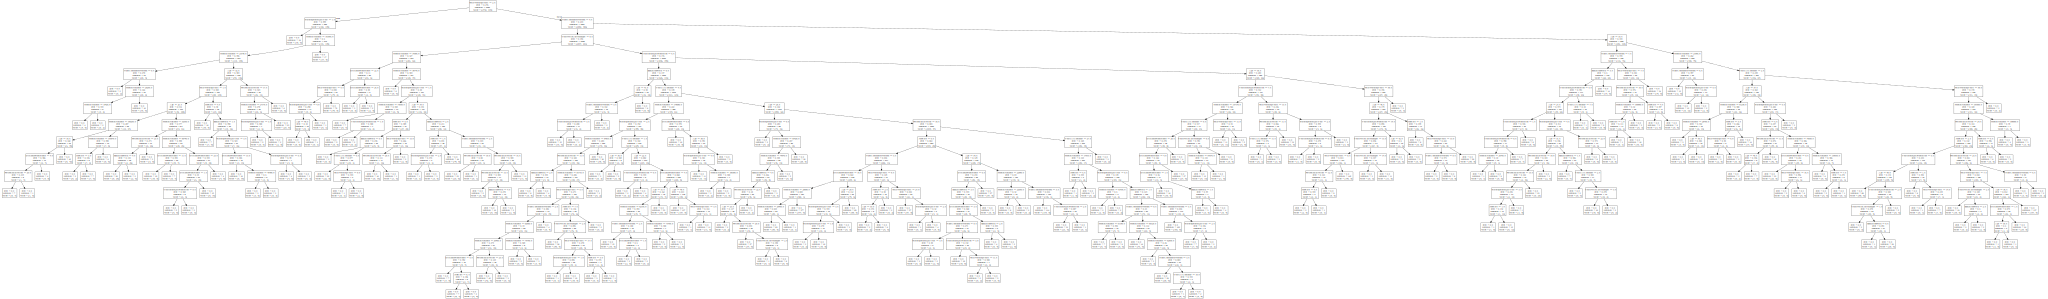

In [1]:
import graphviz
with open("Attrition_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)